In [1]:
import torch
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pickle
from palettable.cartocolors.qualitative import Vivid_10, Bold_10

# import cupy as cp
# from cuml import PCA, UMAP    # gpu
from umap import UMAP
from sklearn.decomposition import PCA


/home/hanyuji/miniconda3/envs/DYffusion/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# dataset_path = '/home/hanyuji/Workbench/ST/ST_data_check/paste_alignment_cortex/PASTE_align/cortex_macaque1_119slice_subset_1000spot_2000gene_HVG.h5ad'
# dataset_path = '/home/hanyuji/Data/scNODE_data/h5ad/zebrafish_scNODE0_2000genes_3227cells_12tps.h5ad'
dataset_path = '/home/hanyuji/Data/scNODE_data/h5ad/drosophila_scNODE2_2000genes_2489cells_11tps.h5ad'

# dataset_path = '/mnt/sdc/hanyuji/Workbench/ST/ST_data_check/PASTE_demo/paste_alignment.h5ad'
adata = sc.read_h5ad(dataset_path)

In [13]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,rt_bc,cell,time,percent.mt,percent.ribo,barn_dro,barn_hu,...,doublet_subcluster,RNA_snn_res.0.08,lasso_age,NNv1_age,NNv2_age,lasso_shift,NNv1_shift,NNv2_shift,tp,n_counts_all
exp12_idx1ATGGCGCCTG.ATGGCAGCTTTACGATGAA,exp12,1083,782,TTACGATGAA,exp12_idx1ATGGCGCCTG.ATGGCAGCTTTACGATGAA,hrs_00_02,0.369344,4.247461,1120,0,...,False,13,2.207040,0.938406,2.123354,0.207040,0.000000,0.123354,1.0,78.0
exp11_idx1GCTTGAAGAG.AACTTGGATTTGATGGCCTT,exp11,2491,1428,TGATGGCCTT,exp11_idx1GCTTGAAGAG.AACTTGGATTTGATGGCCTT,hrs_00_02,0.321156,2.087515,2595,1,...,False,3,-0.072023,0.521427,0.571985,-0.072023,0.000000,0.000000,1.0,184.0
exp10_idx1AGACCATATC_idx2GATCAGTCAT.TCAAGATCTTTCTGATACCA,exp10,255,143,TCTGATACCA,exp10_idx1AGACCATATC_idx2GATCAGTCAT.TCAAGATCTT...,hrs_00_02,0.000000,5.490196,258,0,...,False,4,6.671884,1.500904,2.116008,4.671884,0.000000,0.116008,1.0,27.0
exp12_idx1TAGTAAGCCG.TGGTAGGCTCGGATTAGAA,exp12,539,445,CGGATTAGAA,exp12_idx1TAGTAAGCCG.TGGTAGGCTCGGATTAGAA,hrs_00_02,0.556586,2.782931,555,1,...,False,4,2.227700,0.808839,1.705217,0.227700,0.000000,0.000000,1.0,37.0
exp12_idx1TATAATAGTT.GGTCAGTTTTTACGATGAA,exp12,1003,747,TTACGATGAA,exp12_idx1TATAATAGTT.GGTCAGTTTTTACGATGAA,hrs_00_02,1.595214,3.589232,1033,0,...,False,13,3.399389,1.215150,1.753334,1.399389,0.000000,0.000000,1.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exp10_idx1GCTTGAAGAG_idx2AGATCCTATA.TAAGGTTCATCTGATTAAGA,exp10,396,285,CTGATTAAGA,exp10_idx1GCTTGAAGAG_idx2AGATCCTATA.TAAGGTTCAT...,hrs_16_20,1.767677,13.383838,426,0,...,False,1,20.276041,17.727953,17.092268,0.276041,0.000000,0.000000,11.0,94.0
exp1_idx1TATTAGACTT_idx2CGACTACCAA.GACTCGCTTGGACTCATTG,exp1,277,187,GGACTCATTG,exp1_idx1TATTAGACTT_idx2CGACTACCAA.GACTCGCTTGG...,hrs_16_20,0.000000,1.444043,326,5,...,False,11,13.242569,15.974912,14.889755,-2.757431,-0.025088,-1.110245,11.0,67.0
exp10_idx1TCCTCTGCCG_idx2CGAGTTAGAG.TTACCTAAGTCATCTCTGCA,exp10,1779,1031,CATCTCTGCA,exp10_idx1TCCTCTGCCG_idx2CGAGTTAGAG.TTACCTAAGT...,hrs_16_20,0.843170,8.937605,1879,3,...,False,1,21.303081,18.553507,17.068319,1.303081,0.000000,0.000000,11.0,454.0
exp10_idx1TGGACGACTA_idx2AACCTAGCTT.TCAGGAGATACCGCCAACC,exp10,805,444,ACCGCCAACC,exp10_idx1TGGACGACTA_idx2AACCTAGCTT.TCAGGAGATA...,hrs_16_20,2.608696,12.670807,852,1,...,False,1,18.769671,18.026127,16.764633,0.000000,0.000000,0.000000,11.0,207.0


In [22]:
# timepoints = [10,30,50,70,90,110]
timepoints = [1,3,5,7,9,11]


'''
l = [1, 6, 12]
subset = adata[adata.obs['batch'].isin(l)]
'''

true_list = []
for tp in timepoints:
    # 选择对应时间点的细胞
    # subset = adata[adata.obs['batch'] == tp]
    subset = adata[adata.obs['tp'] == tp]
    # subset = adata[adata.obs['slice'] == tp]
    
    
    # 获取X矩阵
    X_matrix = subset.X.toarray() if hasattr(subset.X, "toarray") else subset.X
    # 添加到数组中
    true_list.append(X_matrix)

In [36]:
# device = cp.cuda.Device(0)
# device.use()

gray_color = (173 / 255, 181 / 255, 189 / 255)

def linearSegmentCMap(num_colors, cmap_name="viridis"):
    '''Construct colormap for linearly segmented colors.'''
    cm = plt.get_cmap(cmap_name)
    color_list = [cm(i//3*3.0/num_colors) for i in range(num_colors)]
    return color_list

def umapWithPCA(traj_data, n_neighbors, min_dist, spread, pca_pcs):
    pca_model = PCA(n_components=pca_pcs, svd_solver="arpack")
    # pca_model = PCA(n_components=pca_pcs, svd_solver="full")
    umap_model = UMAP(n_components=2, n_neighbors=n_neighbors, spread=spread, min_dist=min_dist)
    umap_traj_data = umap_model.fit_transform(pca_model.fit_transform(traj_data))
    return umap_traj_data, umap_model, pca_model

def plotPredAllTime(true_umap_traj, pred_umap_traj, true_cell_tps, pred_cell_tps):
    '''Plot predictions at all timepoints.'''
    unique_tps = np.unique(true_cell_tps).astype(int).tolist()
    n_tps = len(unique_tps)
    # color_list = linearSegmentCMap(n_tps, "viridis")
    color_list = Vivid_10.mpl_colors
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.set_title("True Data", fontsize=15)
    ax2.set_title("Predictions", fontsize=15)
    for i, t in enumerate(unique_tps):
        true_t_idx = np.where(true_cell_tps == t)[0]
        pred_t_idx = np.where(pred_cell_tps == t)[0]
        
        tp_list = [1,3,5,7,9,11]
        ax1.scatter(true_umap_traj[true_t_idx, 0], true_umap_traj[true_t_idx, 1], label=tp_list[t], color=color_list[i], s=10, alpha=1)
        ax2.scatter(pred_umap_traj[pred_t_idx, 0], pred_umap_traj[pred_t_idx, 1], label=tp_list[t], color=color_list[i], s=10, alpha=1)
    ax2.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    # plt.tight_layout()
    plt.show()

def plotPredTestTime(true_umap_traj, pred_umap_traj, true_cell_tps, pred_cell_tps, test_tps):
    '''Plot predictions at testing timepoints.'''
    n_tps = len(np.unique(true_cell_tps))
    # color_list = linearSegmentCMap(n_tps, "viridis")
    n_test_tps = len(test_tps)
    # color_list = linearSegmentCMap(n_test_tps, "viridis")
    color_list = Vivid_10.mpl_colors
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.set_title("True Data", fontsize=15)
    ax2.set_title("Predictions", fontsize=15)
    ax1.scatter(true_umap_traj[:, 0], true_umap_traj[:, 1], label="other", color=gray_color, s=40, alpha=0.5)
    ax2.scatter(true_umap_traj[:, 0], true_umap_traj[:, 1], label="other", color=gray_color, s=40, alpha=0.5)
    for i, t in enumerate(test_tps):
        c = color_list[i]
        true_t_idx = np.where(true_cell_tps == t)[0]
        pred_t_idx = np.where(pred_cell_tps == t)[0]
        ax1.scatter(true_umap_traj[true_t_idx, 0], true_umap_traj[true_t_idx, 1], label=int(t), color=c, s=20, alpha=1.0)
        ax2.scatter(pred_umap_traj[pred_t_idx, 0], pred_umap_traj[pred_t_idx, 1], label=int(t), color=c, s=20, alpha=1.0)
    ax2.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    # plt.tight_layout()
    plt.show()


In [42]:
true_data = true_list
recon_data = true_list
# recon_data = true_list


true_cell_tps = np.concatenate([np.repeat(t, each.shape[0]) for t, each in enumerate(true_data)])
pred_cell_tps = np.concatenate([np.repeat(t, each.shape[0]) for t, each in enumerate(recon_data)])

# true_umap_traj, umap_model, pca_model = umapWithPCA(np.concatenate(true_data, axis=0), n_neighbors=50, min_dist=0.1, pca_pcs=50)
# true_umap_traj, umap_model, pca_model = umapWithPCA(np.concatenate(true_data, axis=0), n_neighbors=100, min_dist=0.5, spread=0.8, pca_pcs=20) # 最好的参数
# true_umap_traj, umap_model, pca_model = umapWithPCA(np.concatenate(true_data, axis=0), n_neighbors=20, min_dist=2, spread=8, pca_pcs=2)
true_umap_traj, umap_model, pca_model = umapWithPCA(np.concatenate(true_data, axis=0), n_neighbors=100, min_dist=0.4, spread=0.4, pca_pcs=15) # 最好的参数



pred_umap_traj = umap_model.transform(pca_model.transform(np.concatenate(recon_data, axis=0)))


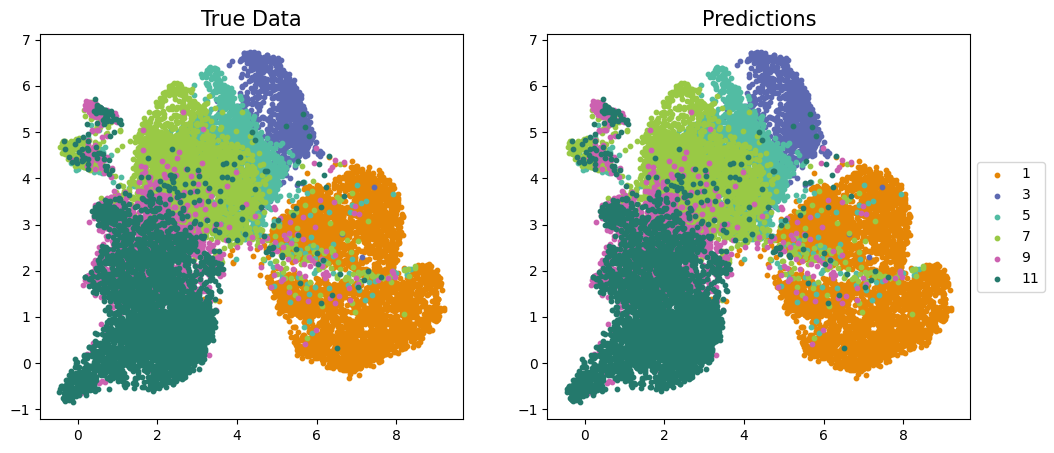

In [43]:
plotPredAllTime(true_umap_traj, pred_umap_traj, true_cell_tps, pred_cell_tps)